# <span style="color:lightblue"><center><b>CLASSIFICAÇÃO DOS ESTÁGIOS</b></center></span>

# **Regressão Logística**

### **Importação das Bibliotecas**

In [1]:
import pandas as pd # Manipulação de Tabelas
import numpy as np # Operações matemáticas
import matplotlib.pyplot as plt # Visualização de Dados
from matplotlib.colors import LinearSegmentedColormap # Manipulação de paletas de cores
from seaborn import heatmap # Mapa de Calor
from funcions import plot_boxplots # Função criada na EDA_numericos

In [2]:
# Leitura dos dados
df = pd.read_csv('../data/dados_processados/liver_cirrhosis_v2.csv')

In [3]:
# Separando as colunas categóricas
categoric_columns = df.select_dtypes(include=['object']).columns

In [4]:
df[categoric_columns].head()

,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema
0,F,N,S,N,N
1,M,S,N,S,N
2,F,N,N,N,N
3,F,N,N,N,N
4,F,N,S,N,N


In [5]:
# Trasnformando as classes em string para binário
colunas_binarias = {column:pd.factorize(df[column])[0] for column in df[categoric_columns].columns}

In [6]:
# Substituindo no DataFrame
df[categoric_columns] = pd.DataFrame(colunas_binarias)

In [7]:
# Convertendo idade em dias para anso
df['Idade'] = (df['Idade']/365).astype(int)
df['Idade']

0       50
1       54
2       32
3       45
4       59
        ..
9632    49
9633    64
9634    67
9635    58
9636    78
Name: Idade, Length: 9637, dtype: int32

In [8]:
df.head()

,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,50,0,0,0,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,54,1,1,1,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,32,0,0,1,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,45,0,0,1,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,59,0,0,0,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [9]:
# Separando as colunas categóricas
numeric_columns = df.select_dtypes('number')

<Axes: >

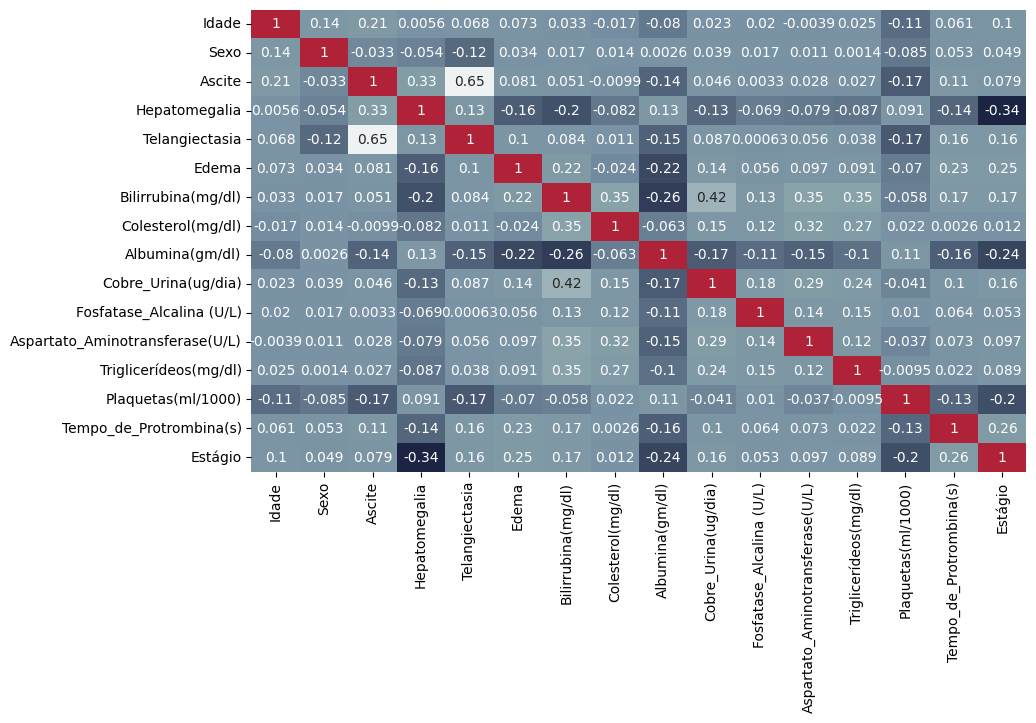

In [10]:
# Mapa de calor com as correlações
colors = ["#1b2442","#7992a4","#829da5","#f4f7f7","#b02238"]
cmap = LinearSegmentedColormap.from_list("custom_palette", colors, N=256)
plt.figure(figsize=[10,6])
heatmap(df.corr(), 
    annot=True, # Escreve os valores dos coeficientes
    cmap=cmap, # Paleta de cores
    cbar=False
)

In [11]:
# Filtando os índices de correlção que possui o módulo > 0.10
mask = df.corr().abs() > 0.1
filtered = df.corr().where(mask)
filtered

,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
Idade,1.000000,0.138954,0.205923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.112695,NaN,NaN
Sexo,0.138954,1.000000,NaN,NaN,-0.124024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ascite,0.205923,NaN,1.000000,0.329621,0.649646,NaN,NaN,NaN,-0.143593,NaN,NaN,NaN,NaN,-0.169384,0.114120,NaN
Hepatomegalia,NaN,NaN,0.329621,1.000000,0.132154,-0.161125,-0.196951,NaN,0.134408,-0.125755,NaN,NaN,NaN,NaN,-0.135294,-0.336901
Telangiectasia,NaN,-0.124024,0.649646,0.132154,1.000000,0.100366,NaN,NaN,-0.146398,NaN,NaN,NaN,NaN,-0.171288,0.163029,0.155757
Edema,NaN,NaN,NaN,-0.161125,0.100366,1.000000,0.224647,NaN,-0.224724,0.139269,NaN,NaN,NaN,NaN,0.225660,0.254994
Bilirrubina(mg/dl),NaN,NaN,NaN,-0.196951,NaN,0.224647,1.000000,0.352127,-0.261299,0.415027,0.132425,0.352460,0.348504,NaN,0.170697,0.172219
Colesterol(mg/dl),NaN,NaN,NaN,NaN,NaN,NaN,0.352127,1.000000,NaN,0.145983,0.117626,0.322665,0.267340,NaN,NaN,NaN
Albumina(gm/dl),NaN,NaN,-0.143593,0.134408,-0.146398,-0.224724,-0.261299,NaN,1.000000,-0.168683,-0.112587,-0.147348,-0.103031,0.107514,-0.156307,-0.237199
Cobre_Urina(ug/dia),NaN,NaN,NaN,-0.125755,NaN,0.139269,0.415027,0.145983,-0.168683,1.000000,0.184010,0.285076,0.239766,NaN,0.101950,0.160070


<Axes: >

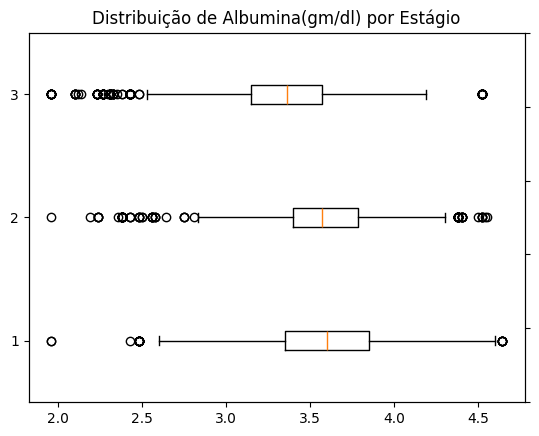

In [12]:
# Boxplots da Albumina por estágio
plot_boxplots(df=df, serie_categoria=df['Estágio'], serie_alvo=df['Albumina(gm/dl)'])

#### **Separação de Dados de Treino e Teste**

In [13]:
from sklearn.model_selection import train_test_split # Separação de dados de treino e teste
from sklearn.linear_model import LogisticRegression # Modelo de Regressão Logística
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Feedback do modelo, matriz de confusão
from sklearn.preprocessing import StandardScaler # Padronizador de Dados

In [14]:
X = df.drop(columns=['Estágio']).values # Dados preditores
Y = df['Estágio'].values # Alvo

In [15]:
# Separação de Dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [16]:
# Instanciando o padronizador
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Padronizando os dados de treino
X_test_scaled = scaler.transform(X_test) # Padronizando os dados de teste

In [17]:
# Salvando o Scaler
import joblib
 
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [22]:
# Instanciando o classificador
classifier = LogisticRegression(max_iter=3000, n_jobs=-1, C=0.1, penalty='l2')

In [23]:
# Treinando o modelo
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=3000, n_jobs=-1)

In [24]:
# Classe da predição
test_predict = classifier.predict(X_test_scaled)

In [25]:
# Feedback do modelo
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           1       0.47      0.53      0.50       753
           2       0.51      0.38      0.43       845
           3       0.63      0.73      0.68       812

    accuracy                           0.54      2410
   macro avg       0.54      0.55      0.54      2410
weighted avg       0.54      0.54      0.54      2410



In [26]:
# Importância das classes para o modelo
coefficients = classifier.coef_
feature_importance_reg = pd.DataFrame(
    coefficients.T, 
    index=df.drop('Estágio', axis=1).columns, 
    columns=classifier.classes_
    )
print("Importância das Variáveis (Coeficientes):\n")
print(feature_importance_reg)

Importância das Variáveis (Coeficientes):

                                        1         2         3
Idade                           -0.013867 -0.103186  0.117053
Sexo                            -0.039215  0.045374 -0.006159
Ascite                           0.006859 -0.152292  0.145433
Hepatomegalia                    0.450878  0.041527 -0.492406
Telangiectasia                  -0.182381  0.053536  0.128846
Edema                           -0.186706  0.007757  0.178949
Bilirrubina(mg/dl)               0.026721 -0.033124  0.006403
Colesterol(mg/dl)                0.016376  0.106785 -0.123160
Albumina(gm/dl)                  0.082023  0.184538 -0.266561
Cobre_Urina(ug/dia)             -0.113144  0.030991  0.082153
Fosfatase_Alcalina (U/L)         0.006756  0.006189 -0.012945
Aspartato_Aminotransferase(U/L) -0.061851  0.063642 -0.001791
Triglicerídeos(mg/dl)           -0.083025  0.021678  0.061347
Plaquetas(ml/1000)               0.183347 -0.015124 -0.168223
Tempo_de_Protrombina(s)    

Matriz de Confusão:
[[400 212 141]
 [324 320 201]
 [119 101 592]]


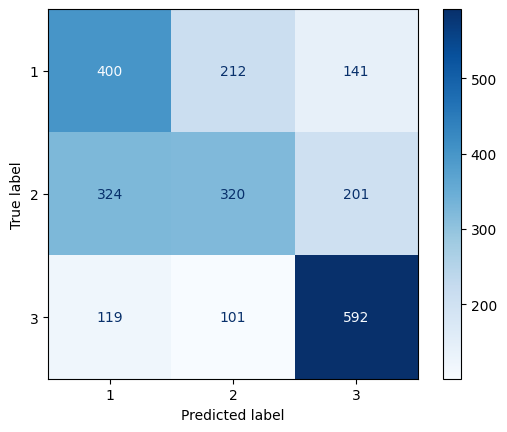

In [27]:
# Matriz de confusão
cm = confusion_matrix(y_test, test_predict)

print("Matriz de Confusão:")
print(cm)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
joblib.dump(classifier, 'classifier.joblib')

['classifier.joblib']

Potencias colunas a serem retiradas:
'Sexo','Fosfatase_Alcalina (U/L)','Aspartato_Aminotransferase(U/L)','Triglicerídeos(mg/dl)'

# **Árvore de Decisão**

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Modelo de Árvore de Decisão, plotagem da árvore

In [48]:
# Instanciando Árvore de decisão
arvore = DecisionTreeClassifier(
    random_state=42, 
    min_impurity_decrease=0.000091,
    criterion='entropy',
    min_samples_leaf=5,
    )

In [49]:
# Treinando o modelo
arvore.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=9.1e-05,
                       min_samples_leaf=5, random_state=42)

In [50]:
# Testando o modelo
arvore_predict = arvore.predict(X_test_scaled)

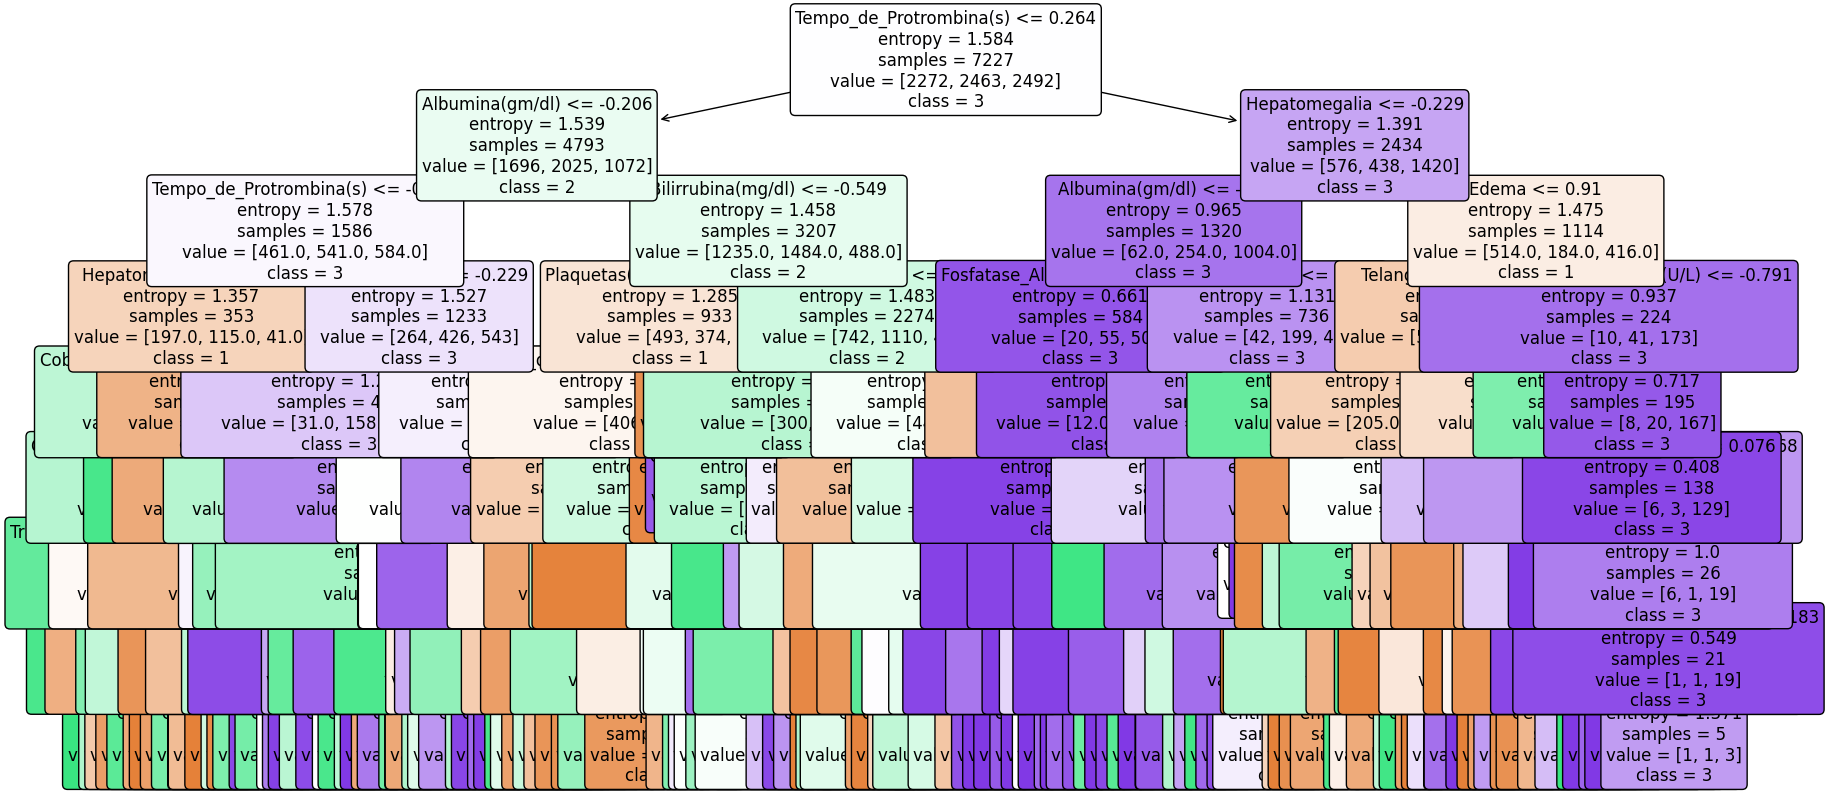

In [34]:
# Plotando a árvore
plt.figure(figsize=(20,10))  
plot_tree(
    arvore, 
    feature_names=df.drop(columns=['Estágio']).columns, 
    class_names=[str(cls) for cls in arvore.classes_], 
    filled=True, 
    rounded=True, 
    fontsize=12
    )
plt.show()

Devido a alta complexidade do modelo, a árvore acabou ficando com muitos nós.

In [51]:
# Feedback do modelo
print(classification_report(y_test,arvore_predict))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75       753
           2       0.72      0.74      0.73       845
           3       0.83      0.82      0.82       812

    accuracy                           0.77      2410
   macro avg       0.77      0.77      0.77      2410
weighted avg       0.77      0.77      0.77      2410



Acurácia de 77%

#### **Utilizando o Minimal Cost Complexity Pruning**

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
arvore_teste = DecisionTreeClassifier()

In [54]:
path = arvore_teste.cost_complexity_pruning_path(X_train_scaled, y_train)

In [55]:
param_grid = {'ccp_alpha': path.ccp_alphas}

CV_clf = GridSearchCV(
    estimator=arvore, 
    param_grid=param_grid, 
    cv = 7, 
    verbose=2, 
    n_jobs=-1
    )
CV_clf.fit(X_train, y_train)

Fitting 7 folds for each of 902 candidates, totalling 6314 fits


GridSearchCV(cv=7,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              min_impurity_decrease=9.1e-05,
                                              min_samples_leaf=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.30616669e-05, 2.30616669e-05, 2.30616669e-05, 2.30616669e-05,
       2.30616669e-05, 2.64530885e-05, 2.83213453e-05, 2.88270...
       2.10274855e-03, 2.14674625e-03, 2.24418437e-03, 2.40708472e-03,
       2.42738264e-03, 2.60520494e-03, 2.74225098e-03, 2.78840814e-03,
       2.78886448e-03, 2.82602835e-03, 3.05443502e-03, 3.20874567e-03,
       3.21457235e-03, 3.39128034e-03, 3.83877106e-03, 3.96879538e-03,
       4.01808314e-03, 5.83488791e-03, 5.85936215e-03, 6.26356586e-03,
       7.19093135e-03, 8.49958201e-03, 1.03358069e-02, 1.29237118e-02,
       2.69511693e-02, 4.51141826e-02])},
             verbose=2)

In [56]:
# Atribuindo o ccp_aplha
ccp_alpha = CV_clf.best_estimator_.ccp_alpha

In [62]:
# Instanciando uma nova árvore com o ccp_alpha
arvore_2 = DecisionTreeClassifier(
    random_state=42, 
    ccp_alpha=ccp_alpha,
    min_impurity_decrease=9.1e-05,
    criterion='entropy',
    )

In [63]:
arvore_2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0008679494683068241, criterion='entropy',
                       min_impurity_decrease=9.1e-05, random_state=42)

In [64]:
arvore_2_predict = arvore_2.predict(X_test_scaled)

In [39]:
# Plotando a árvore
plt.figure(figsize=(20,10))  
plot_tree(
    arvore_2, 
    feature_names=df.drop(columns=['Estágio']).columns, 
    class_names=[str(cls) for cls in arvore_2.classes_], 
    filled=True, 
    rounded=True, 
    fontsize=12
    )
plt.show()

In [65]:
print(classification_report(y_test, arvore_2_predict))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75       753
           2       0.72      0.74      0.73       845
           3       0.85      0.81      0.83       812

    accuracy                           0.77      2410
   macro avg       0.77      0.77      0.77      2410
weighted avg       0.77      0.77      0.77      2410



Acurácia de 77%

In [186]:
# Obter a importância das variáveis
importances = arvore_2.feature_importances_
feature_importance_tree = pd.DataFrame(
    importances, 
    index=df.drop('Estágio', axis=1).columns, 
    columns=['Importance']
    ).sort_values(by='Importance', ascending=False)

print("Importância das Variáveis:\n")
print(feature_importance_tree)

Importância das Variáveis:

                                 Importance
Tempo_de_Protrombina(s)            0.191470
Albumina(gm/dl)                    0.151827
Plaquetas(ml/1000)                 0.126910
Idade                              0.094946
Bilirrubina(mg/dl)                 0.074808
Hepatomegalia                      0.065131
Cobre_Urina(ug/dia)                0.051084
Aspartato_Aminotransferase(U/L)    0.044216
Triglicerídeos(mg/dl)              0.040771
Colesterol(mg/dl)                  0.040409
Fosfatase_Alcalina (U/L)           0.039957
Edema                              0.033297
Telangiectasia                     0.023783
Ascite                             0.016762
Sexo                               0.004631


In [187]:
# Salvando modelo
joblib.dump(arvore_2, 'decision_tree.joblib')

['decision_tree.joblib']